# 支持向量机

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
# 导入自己写的工具类
from my_tools import *
# 忽略warning
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

In [2]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")

### 在SVM中连续型变量应尽可能归一化
#### 11到60列是连续型的变量，要归一化

In [3]:
jibing.iloc[:,11:62].head()

,血红蛋白,红细胞压积,血小板计数,血小板压积,总蛋白g/L,白蛋白g/L,球蛋白g/L,白球比,ALT丙氨酸氨基转移酶,碱性磷酸酶,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
0,120.0,36.6,307.0,0.276,73.8,41.7,32.1,1.3,7,102,...,10.0,1.32,48.0,12.0,1.9,49.0,9.9,12.3,43.5,3
1,131.0,38.5,207.0,0.191,67.9,44.5,23.4,1.9,30,73,...,10.0,1.67,77.0,16.0,1.4,81.0,9.2,16.9,55.5,0
2,128.0,38.5,86.0,0.093,57.3,36.2,21.1,1.7,24,78,...,15.0,1.86,78.0,22.0,1.9,89.0,9.9,7.0,51.4,0
3,146.0,45.4,190.0,0.174,81.1,47.7,33.4,1.4,18,69,...,16.0,1.68,92.0,12.0,1.4,69.0,9.3,15.8,53.0,0
4,135.0,40.3,102.0,0.114,79.2,52.2,27.0,1.9,24,69,...,13.0,1.60,58.0,14.0,1.7,153.0,8.1,13.2,45.9,0


In [4]:
jibing.index = range(jibing.shape[0])

### 归一化

In [5]:
jibing = guiyihua(jibing)

In [6]:
jibing.head()

,左右,是否外伤,症状持续时间,明显夜间痛,年龄,高血压,高血脂,2型糖尿病,吸烟与否,饮酒与否,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
0,0,0,3,0,0.110360,1,0,0,0,0.0,...,0.264471,0.001330,0.004004,0.075188,0.139535,0.144202,0.048057,0.235698,0.280443,3
1,1,1,2,0,0.103604,1,0,0,0,0.0,...,0.264471,0.003354,0.006523,0.105263,0.100775,0.281130,0.040900,0.340961,0.501845,0
2,1,0,4,1,0.087838,0,0,0,0,0.0,...,0.424368,0.004453,0.006610,0.150376,0.139535,0.315362,0.048057,0.114416,0.426199,0
3,1,0,3,0,0.099099,0,0,0,0,0.0,...,0.456348,0.003412,0.007826,0.075188,0.100775,0.229782,0.041922,0.315789,0.455720,0
4,0,1,3,0,0.101351,0,0,0,0,0.0,...,0.360409,0.002950,0.004873,0.090226,0.124031,0.589217,0.029652,0.256293,0.324723,0


### 标准化

In [7]:
jibing = biaozhunhua(jibing)

In [8]:
jibing.head()

,左右,是否外伤,症状持续时间,明显夜间痛,年龄,高血压,高血脂,2型糖尿病,吸烟与否,饮酒与否,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
0,0,0,3,0,0.402864,1,0,0,0,-0.448892,...,-0.396787,-0.160764,-0.176406,-1.241122,0.269307,-0.755958,-0.420427,-0.880622,-1.226099,3
1,1,1,2,0,0.180258,1,0,0,0,-0.448892,...,-0.396787,-0.079732,-0.098498,-0.773740,-0.390723,0.608493,-0.538745,-0.132586,0.088761,0
2,1,0,4,1,-0.339156,0,0,0,0,-0.448892,...,1.055008,-0.035743,-0.095811,-0.072667,0.269307,0.949606,-0.420427,-1.742489,-0.360483,0
3,1,0,3,0,0.031854,0,0,0,0,-0.448892,...,1.345367,-0.077417,-0.058200,-1.241122,-0.390723,0.096824,-0.521842,-0.311464,-0.185168,0
4,0,1,3,0,0.106056,0,0,0,0,-0.448892,...,0.474290,-0.095938,-0.149541,-1.007431,0.005295,3.678509,-0.724673,-0.734267,-0.963127,0


## 使用SVC进行训练

In [9]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

### 使用不同核函数
- 支持向量机可以通过核函数来将数据映射到更高维度，从而使模型更有效地拟合数据。

- ploy:多项式核
- rbf:径向基函数
- linear:线性核函数
- sigmoid:核函数


### 根据结果，有两种需要探索的核函数，sigmoid，linear

In [10]:
smote = SMOTE(sampling_strategy=1, random_state=42)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3,random_state=42)
Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)
for kernel in ["poly","rbf",'linear',"sigmoid"]:
    clf = SVC(kernel=kernel,random_state=42)
    clf.fit(Xtrain, Ytrain)
    y_pre = clf.predict(Xtest)
    metrics_ = res_metrics(Ytest,y_pre,"核函数为: {}".format(kernel))

####################核函数为: poly####################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.8056570140920862 | 0.3103448275862069 | 0.4480843629362087 |
+--------------------+--------------------+--------------------+
####################核函数为: rbf#####################
+--------------------+--------------------+---------------------+
|     precision      |       recall       |          f1         |
+--------------------+--------------------+---------------------+
| 0.8051937984496125 | 0.1724137931034483 | 0.28401276375836354 |
+--------------------+--------------------+---------------------+
###################核函数为: linear###################
+--------------------+---------------------+--------------------+
|     precision      |        recall       |         f1         |
+--------------------+---------------------+----------------

## 对linear 和 sigmoid 进行调参

### 首先是 linear ，SVM 默认的核函数就是linear

## 特征筛选

### SelectKBest：
根据指定的统计检验方法选择出最优的 k 个特征。
### SMOTE：
使用类似插值的方法扩充少数类。
### mutual_info_classif：
衡量两个随机变量间相关性的一种方法，互信息的数值越大，则两个随机变量之间的相关性越强。

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
f1_list = []
best_k = -1
best_score = -1
set_font()
for i in range(1,60):
#     sampler = RandomOverSampler(sampling_strategy=0.2, random_state=42)
    smote = SMOTE(sampling_strategy=1, random_state=42)
    selector = SelectKBest(mutual_info_classif, k=i)
    jibing_ = selector.fit_transform(jibing, jibing_res)
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing_,jibing_res,test_size=0.3,random_state=42)
#     Xtrain, Ytrain = sampler.fit_resample(Xtrain,Ytrain)
    Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)
    clf = SVC(random_state=42)
    clf.fit(Xtrain, Ytrain)
    y_pre = clf.predict(Xtest)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
    if best_score < metrics_["f1-score"]:
        best_k = i
        best_score = metrics_["f1-score"]

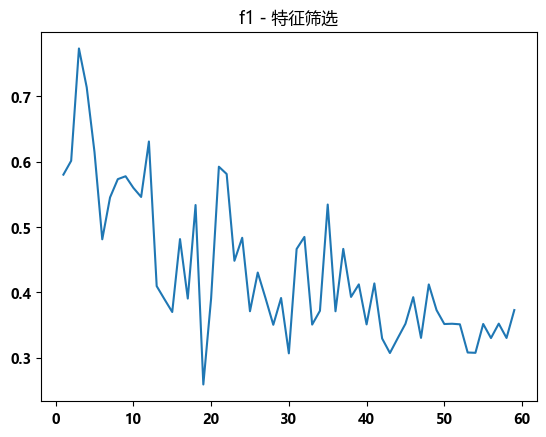

In [12]:
zhexiantu(range(1,60),f1_list,"f1 - 特征筛选")

### 线性的核函数无法完美地拟合高维的数据，从而产生了下降趋势。

In [13]:
best_k

3

### 实际上，这里所做的是牺牲多数样本的准确性
### 尽可能将少数样本找出来

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=42)
selector = SelectKBest(mutual_info_classif, k=3)
jibing_ = selector.fit_transform(jibing, jibing_res)

Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing_,jibing_res,test_size=0.3,random_state=42)
#     Xtrain, Ytrain = sampler.fit_resample(Xtrain,Ytrain)
Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)

clf = SVC(random_state=42)
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"find_best")
# f1_list.append(metrics_["f1-score"])

####################find_best#####################
+--------------------+--------------------+-------------------+
|     precision      |       recall       |         f1        |
+--------------------+--------------------+-------------------+
| 0.7883562091503269 | 0.5344827586206896 | 0.637058344527622 |
+--------------------+--------------------+-------------------+


### PCA 没多大作用

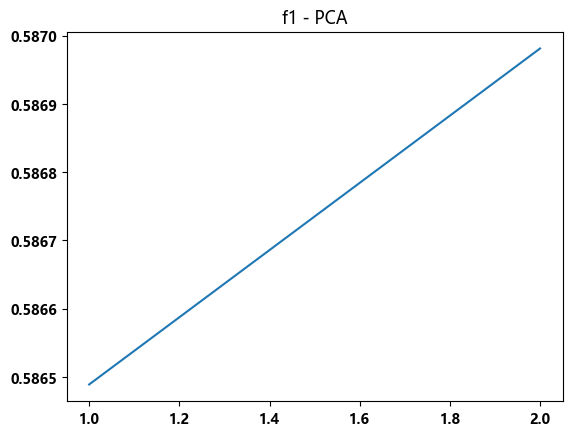

In [21]:
f1_list = []
from sklearn.manifold import TSNE
for i in range(1,3):
    clf = SVC(random_state=42)
    pca = PCA(n_components=i,random_state=42)
    Xtrain_ = pca.fit_transform(Xtrain,Ytrain)
    clf.fit(Xtrain_, Ytrain)
    Xtest_ = pca.fit_transform(Xtest)
    y_pre = clf.predict(Xtest_)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(range(1,3),f1_list,"f1 - PCA")

### TSNE效果很好

In [ ]:
f1_list = []
from sklearn.manifold import TSNE
for i in range(1,3):
    clf = SVC(random_state=42)
    tsne = TSNE(n_components=i,random_state=42)
    Xtrain_ = tsne.fit_transform(Xtrain,Ytrain)
    clf.fit(Xtrain_, Ytrain)
    Xtest_ = tsne.fit_transform(Xtest)
    y_pre = clf.predict(Xtest_)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])

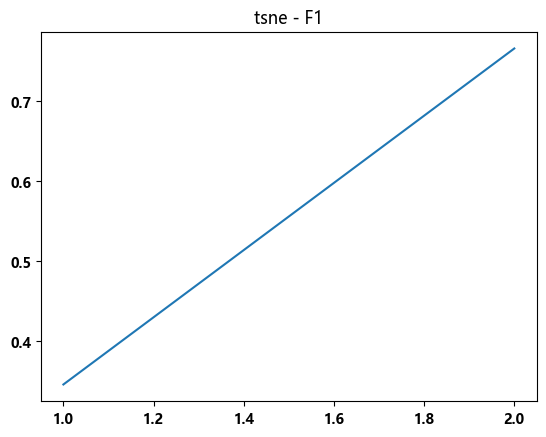

In [24]:
zhexiantu(range(1,3),f1_list,"tsne - F1")

In [25]:
clf = SVC(random_state=42)
tsne = TSNE(n_components=2,random_state=42)
Xtrain_ = tsne.fit_transform(Xtrain,Ytrain)
clf.fit(Xtrain_, Ytrain)
Xtest_ = tsne.fit_transform(Xtest)
y_pre = clf.predict(Xtest_)
metrics_ = res_metrics(Ytest,y_pre,"TSNE-F1")
f1_list.append(metrics_["f1-score"])

#####################TSNE-F1######################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.7909002130681818 | 0.7413793103448276 | 0.7653395422396697 |
+--------------------+--------------------+--------------------+


### 综上，选择TSNE进行降到2维时，linear 的效果最好
### f1-score 为0.765

## 训练

### 要调的参数
- 惩罚系数 C
- 核函数

### 接下来要对 sigmoid 核函数进行调参

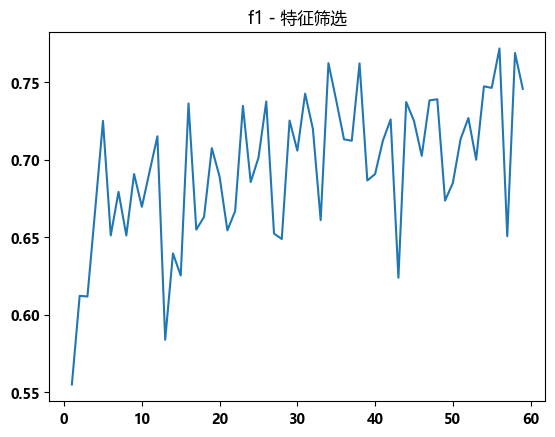

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
f1_list = []
set_font()
smote = SMOTE(sampling_strategy=1, random_state=42)
for i in range(1,60):
    selector = SelectKBest(mutual_info_classif, k=i)
    jibing_ = selector.fit_transform(jibing, jibing_res)
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing_,jibing_res,test_size=0.3,random_state=42)
    Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)    
    clf = SVC(kernel="sigmoid",random_state=42)
    clf.fit(Xtrain, Ytrain)
    y_pre = clf.predict(Xtest)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(range(1,60),f1_list,"f1 - 特征筛选")

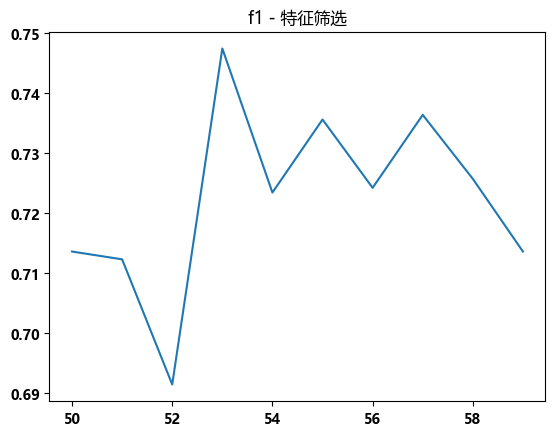

In [30]:
f1_list = []
set_font()
for i in range(50,60):
    smote = SMOTE(sampling_strategy=1, random_state=42)
    selector = SelectKBest(mutual_info_classif, k=i)
    jibing_ = selector.fit_transform(jibing, jibing_res)
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing_,jibing_res,test_size=0.3,random_state=42)
    Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)
    clf = SVC(kernel="sigmoid",random_state=42)
    clf.fit(Xtrain, Ytrain)
    y_pre = clf.predict(Xtest)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(range(50,60),f1_list,"f1 - 特征筛选")

### 确定了选择前53个特征

In [32]:
smote = SMOTE(sampling_strategy=1, random_state=42)
selector = SelectKBest(mutual_info_classif, k=53)
jibing_ = selector.fit_transform(jibing, jibing_res)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing_,jibing_res,test_size=0.3,random_state=42)
Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)
clf = SVC(kernel="sigmoid",random_state=42)
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"f1-select")
f1_list.append(metrics_["f1-score"])

####################f1-select#####################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.8095399875039051 | 0.6724137931034483 | 0.7346327001417388 |
+--------------------+--------------------+--------------------+


### 降维-PCA

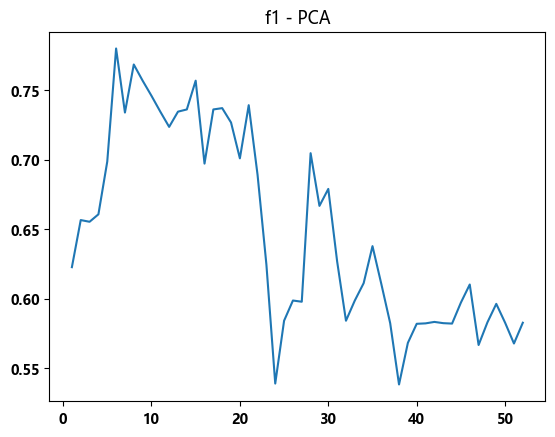

In [36]:
f1_list = []
for i in range(1,53):
    clf = SVC(kernel="sigmoid",random_state=42)
    pca = PCA(n_components=i,random_state=42)
    Xtrain_ = pca.fit_transform(Xtrain,Ytrain)
    clf.fit(Xtrain_, Ytrain)
    Xtest_ = pca.fit_transform(Xtest)
    y_pre = clf.predict(Xtest_)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(range(1,53),f1_list,"f1 - PCA")

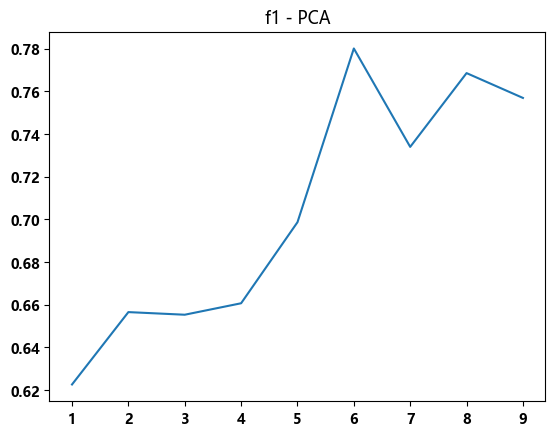

In [37]:
f1_list = []
for i in range(1,10):
    clf = SVC(kernel="sigmoid",random_state=42)
    pca = PCA(n_components=i,random_state=42)
    Xtrain_ = pca.fit_transform(Xtrain,Ytrain)
    clf.fit(Xtrain_, Ytrain)
    Xtest_ = pca.fit_transform(Xtest)
    y_pre = clf.predict(Xtest_)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(range(1,10),f1_list,"f1 - PCA")

### TSNE

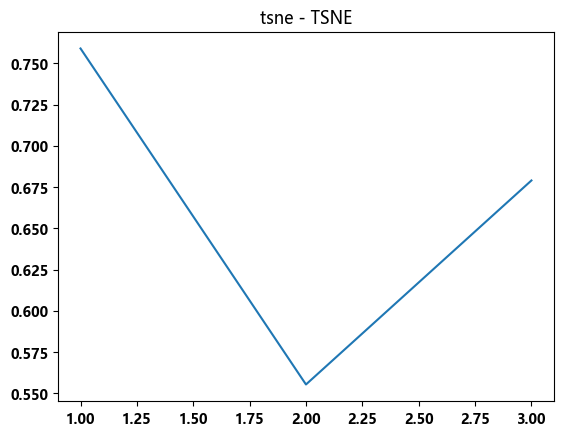

In [38]:
f1_list = []
from sklearn.manifold import TSNE
for i in range(1,4):
    clf = SVC(kernel="sigmoid",random_state=42)
    tsne = TSNE(n_components=i,random_state=42)
    Xtrain_ = tsne.fit_transform(Xtrain,Ytrain)
    clf.fit(Xtrain_, Ytrain)
    Xtest_ = tsne.fit_transform(Xtest)
    y_pre = clf.predict(Xtest_)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(range(1,4),f1_list,"tsne - TSNE")

### 最终确定使用PCA降到6维

In [41]:
clf = SVC(kernel="sigmoid",random_state=42)
pca = PCA(n_components=6,random_state=42)
Xtrain_ = pca.fit_transform(Xtrain,Ytrain)
clf.fit(Xtrain_, Ytrain)
Xtest_ = pca.fit_transform(Xtest)
y_pre = clf.predict(Xtest_)
metrics_ = res_metrics(Ytest,y_pre,"PCA-sigmoid")
f1_list.append(metrics_["f1-score"])

###################PCA-sigmoid####################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.8232222222222222 | 0.7413793103448276 | 0.7801602013904365 |
+--------------------+--------------------+--------------------+


### 寻找C的范围

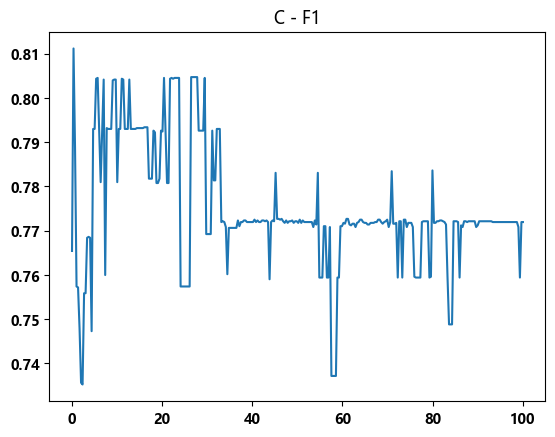

In [45]:
f1_list = []
for c_ in np.linspace(0.1,100,300):
    clf = SVC(kernel='sigmoid',C=c_)
    clf = clf.fit(Xtrain_,Ytrain)
    y_pre = clf.predict(Xtest_)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(np.linspace(0.1,100,300),f1_list,"C - F1")

### C的取值越小，拟合程度越好，但也不能太小
### 最佳值大约在5到6之间。

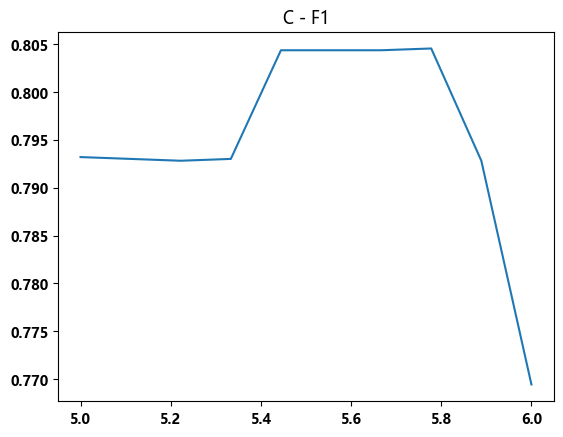

In [63]:
f1_list = []
for c_ in np.linspace(5,6,10):
    clf = SVC(kernel='sigmoid',C=c_,random_state=42)
    clf = clf.fit(Xtrain_,Ytrain)
    y_pre = clf.predict(Xtest_)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(np.linspace(5,6,10),f1_list,"C - F1")

### C = 5.6

In [64]:
clf = SVC(kernel='sigmoid',C=5.6,random_state=42)
clf = clf.fit(Xtrain_,Ytrain)
y_pre = clf.predict(Xtest_)
metrics_ = res_metrics(Ytest,y_pre,"SVM-F1-Final")

###################SVM-F1-Final###################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.8350202848153668 | 0.7758620689655172 | 0.8043549105674161 |
+--------------------+--------------------+--------------------+


### 通过与 linear 核函数对比发现
### 支持向量机的 f1-score 最高0.804